# Data Science Project: Predicting Medical Costs

The goal for this project is to predict medical cost based on the datasets provided to me: Below is a table of contents to help in guiding you through the code:

### 1. Data Importing
### 2. Exploratorary Data Analysis
### 3. Data Cleaning/ Feature Engineering
### 4. Model Preparation
### 5. Model Runs
### 6. Hyperparameter Tuning
### 7. Testing to New Data

 # 1.  Data Importing

The goal for this project is to predict medical cost on new unseen data based on the datasets provided to me. 
The first step is to import the libraries that will be used as shown below:

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from sklearn.preprocessing import StandardScaler

Next, I will import the first training dataset with demographic, activity based, and conditional information data as shown below:


In [29]:
# reading in data and getting first 5 rows
train_df = pd.read_csv('train_better_health.csv', index_col = 0)
train_df.head(5)

,Member_ID,Age,Gender,Zip_Code,Locality,PC_Cluster,HUB_X1,HUB_X2,HUB_X3,HUB_X4,Web_Code,PCP_Status,Social_Score,Face_Rec,ER_Cost,Emergency_Cost_Proportion,Condition_Count,Risk,Medical_Cost
1,R7047662,41.000099,M,33418,Rural,Moderate Web Activity Identified,0,1,1,0,N41,Value-Based PCP,158.8,2588,134.70,0.96,0,0.863409,140.307646
2,H2687125,45.882875,M,32026,Rural,Moderate Web Activity Identified,0,1,1,0,U41,Value-Based PCP,878.6,15138,1314.41,0.62,6,1.720760,2120.017456
3,A9673604,45.546725,M,33598,Rural,Moderate Web Activity Identified,0,1,1,0,W67,Value-Based PCP,921.8,9786,11.67,0.02,3,1.271352,583.566051
4,L7196058,46.049514,F,32569,Rural,Moderate Web Activity Identified,0,1,1,0,J20,Value-Based PCP,781.9,25203,8602.33,0.79,6,1.495789,10889.027861
5,O0202680,40.002749,F,33032,Rural,Moderate Web Activity Identified,0,1,1,0,J13,Value-Based PCP,770.9,1555,397.34,0.04,4,1.470172,9933.619908


There are a variety of columns ranging from float, int64, and text columns. Moreover, because there appears to be some text columns, one hot encoding will need to done in order to use the text column as integer columns into my machine learning model.

In [30]:
# getting more info on the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57134 entries, 1 to 57134
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Member_ID                  57134 non-null  object 
 1   Age                        57134 non-null  float64
 2   Gender                     57134 non-null  object 
 3   Zip_Code                   57134 non-null  int64  
 4   Locality                   57134 non-null  object 
 5   PC_Cluster                 57134 non-null  object 
 6   HUB_X1                     57134 non-null  int64  
 7   HUB_X2                     57134 non-null  int64  
 8   HUB_X3                     57134 non-null  int64  
 9   HUB_X4                     57134 non-null  int64  
 10  Web_Code                   57134 non-null  object 
 11  PCP_Status                 57134 non-null  object 
 12  Social_Score               57134 non-null  float64
 13  Face_Rec                   57134 non-null  int

There are 57,134 instances with 19 attributes within the dataset.

In [31]:
#running descriptive statistic on the dataset
train_df.describe()

,Age,Zip_Code,HUB_X1,HUB_X2,HUB_X3,HUB_X4,Social_Score,Face_Rec,ER_Cost,Emergency_Cost_Proportion,Condition_Count,Risk,Medical_Cost
count,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000
mean,42.472021,33271.544019,0.398869,0.900672,0.801694,0.491931,486.683593,25519.493577,1409.993589,0.499561,2.473553,1.185538,2805.738632
std,4.337594,789.961962,0.489670,0.299104,0.398727,0.499939,279.553662,14144.244329,4694.020422,0.292581,3.113952,1.160434,8081.536100
min,28.092720,32003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.434758,32615.000000,0.000000,1.000000,1.000000,0.000000,245.100000,13276.000000,21.170000,0.240000,0.000000,0.031105,82.796923
50%,42.076707,33187.000000,0.000000,1.000000,1.000000,0.000000,486.200000,25479.500000,150.940000,0.500000,1.000000,0.950376,387.891854
75%,45.077185,33841.000000,1.000000,1.000000,1.000000,1.000000,727.500000,37804.000000,826.780000,0.750000,4.000000,1.908900,1973.285269
max,71.051670,34997.000000,1.000000,1.000000,1.000000,1.000000,971.200000,50000.000000,233977.600000,1.000000,27.000000,7.649101,564768.800000


There are several observations that can be made from above. For example, the average age for this dataset is about 42 years old with the mean and median being very close to each other. 

The average social score seems to hover at around 486.86 and the average emerency room cost for this dataset is about $1,409.99.

There also seems to be a huge outlier with a cost of 233,977 dollars. 

The average medical cost for this dataset is about 2,805.73 dollars
with the median being at about 387 with an extreme high of 564,768.80.

Another observation I notice is there are different scales of measurement within the dataset. This finding tells me the data will need to be standardized in order to better fit into my machine learning models.

I will also import the other dataset showing visit counts for every landing page for a customer:

In [32]:
# reading in the train clicks dataset and getting the first 5 rows.
train_clicks_df = pd.read_csv('train_clicks.csv', index_col = 0)
train_clicks_df.head(5)

,Member_ID,Landing,Visits
1,Q8330858,Homepage,452
2,F1978372,Homepage,2
3,E2172254,Homepage,49
4,N9540435,Homepage,1
5,H9542914,Homepage,234


In [33]:
train_clicks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86205 entries, 1 to 86205
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Member_ID  86205 non-null  object
 1   Landing    86205 non-null  object
 2   Visits     86205 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


There are 86,205 instances with 3 attributes

In [34]:
train_clicks_df.describe()

,Visits
count,86205.000000
mean,39.541419
std,98.683201
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,623.000000


The median for the number of visits is actually at 0 which tells me that the majority of the patients within the dataset didn't visit any of the webpages that much.

# 2. Exploratory Data Analysis

### Distribution Plots

First, I'll be exploring some of the distribution plots in order to understand how this dataset is distributed. I will start with Age:

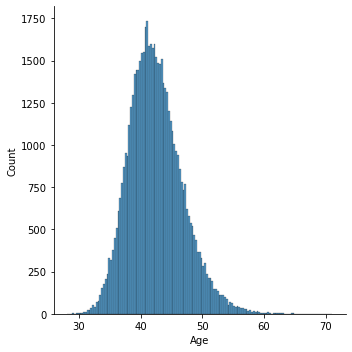

In [35]:
sns.displot(train_df['Age'])
plt.show()

Based on the plot above, it appears that the age variable seems to follow a normal distribution with most of the observations centered around the mean.

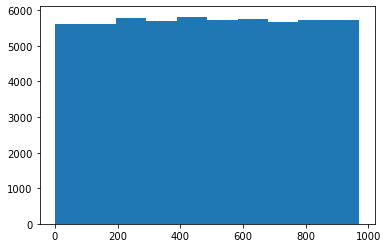

In [36]:
plt.hist(train_df['Social_Score'])
plt.show()

Looking at Social_Score, the plot doesn't appear to follow a normal distribution at all. Let's see what happens when I take a log of it:

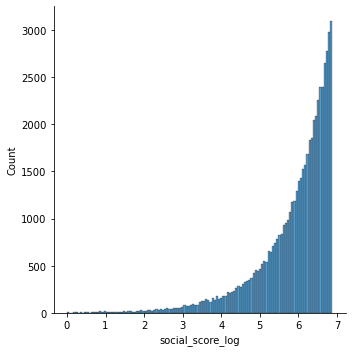

In [37]:
# taking a log of social score and plotting it
train_df['social_score_log'] = np.log1p(train_df['Social_Score'])
sns.displot(train_df['social_score_log'])
plt.show()

Now the distribution appears to have a rigtht skewed distribution. This variable may or may not be used as part of the independent features depending on what the correlation matrix tells me.

Next, we'll look at the face_rec variable

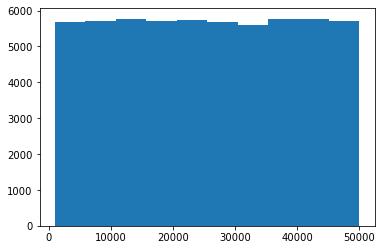

In [38]:
plt.hist(train_df['Face_Rec'])
plt.show()

Face_Rec also does not appear to follow a normal distribution as well with a variety of values reaching up to 5500. Let's see what happens taking a log of it:

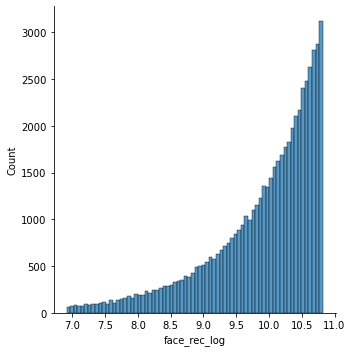

In [39]:
# taking a log of face rec and plotting it
train_df['face_rec_log'] = np.log1p(train_df['Face_Rec'])
sns.displot(train_df['face_rec_log'])
plt.show()

Based on the graph above, it seems taking a log of the variable helps in seeing that Face_Rec has a non-normal distribution with most values being close to the right.

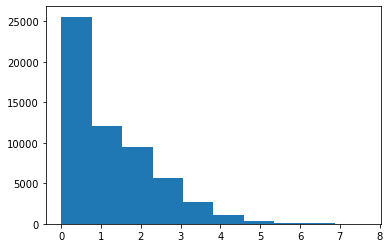

In [40]:
plt.hist(train_df['Risk'])
plt.show()

Finally, taking a look at Risk shows that the distribution tends to have a left tail with most of the patients having no medical conditions. Let's see what happens when a log is taking:

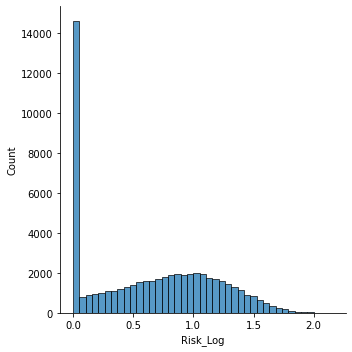

In [41]:
# taking a log of risk log and plotting it
train_df['Risk_Log'] = np.log1p(train_df['Risk'])
sns.displot(train_df['Risk_Log'])
plt.show()

While a high number of values still seem to be at 0, the data would appear to follow a normal distribution 

### Univariate Analysis

To get a feel for the data, I want to graph and look at the distinct counts within the dataset. I'll be generating several bar graphs and frequency counts to do this:

F    30654
M    26419
U       61
Name: Gender, dtype: int64

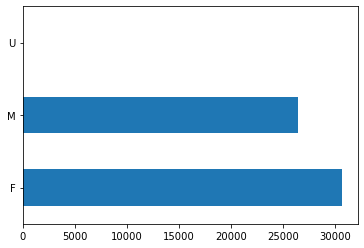

In [42]:
train_df.Gender.value_counts().plot(kind = 'barh')
train_df.Gender.value_counts()

There's more females than males in the dataset with 30,654 female patients and 26,419 patients respectively. There's also about 61 who did not fill anything out based on the above.

Rural      37229
Suburb     17073
Country     2832
Name: Locality, dtype: int64

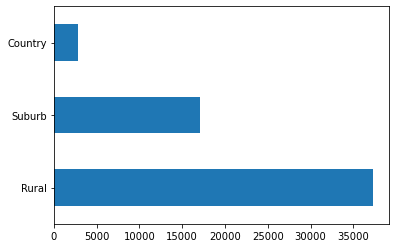

In [43]:
train_df.Locality.value_counts().plot(kind = 'barh')
train_df.Locality.value_counts()

There are 37,229 patients who came from a rural location, 17,073 who live in the suburbs, and 2,832 who live in the country.

Value-Based PCP    25638
No PCP             17362
Assigned PCP       14134
Name: PCP_Status, dtype: int64

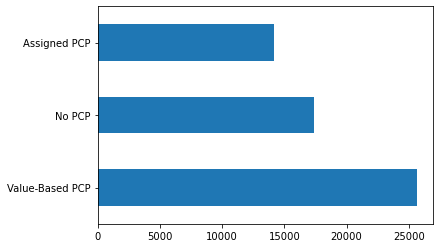

In [44]:
train_df.PCP_Status.value_counts().plot(kind = 'barh')
train_df.PCP_Status.value_counts()

There are 56,694 patients with a value based primary care physician, 38,458 who did not have a primary care physician, and 30,946 patients who were assigned an assigned primary care physician.

Moderate Web Activity Identified    56019
Low Web Activity Identified           580
Computer Super User                   535
Name: PC_Cluster, dtype: int64

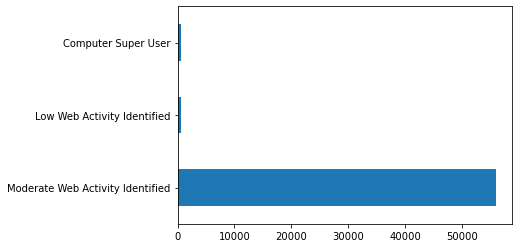

In [45]:
train_df.PC_Cluster.value_counts().plot(kind = 'barh')
train_df.PC_Cluster.value_counts()

Most of the patients within the dataset tended to have moderate web based activity based on the above counts and graphs.

0    34345
1    22789
Name: HUB_X1, dtype: int64

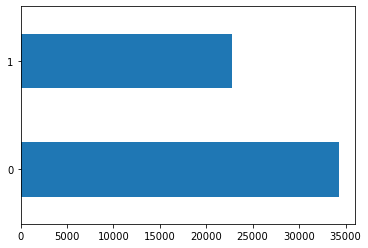

In [46]:
train_df.HUB_X1.value_counts().plot(kind = 'barh')
train_df.HUB_X1.value_counts()

Looking above, there appears to be more values for 

1    51459
0     5675
Name: HUB_X2, dtype: int64

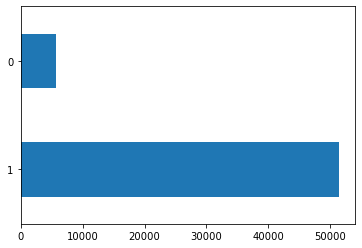

In [47]:
train_df.HUB_X2.value_counts().plot(kind = 'barh')
train_df.HUB_X2.value_counts()

1    45804
0    11330
Name: HUB_X3, dtype: int64

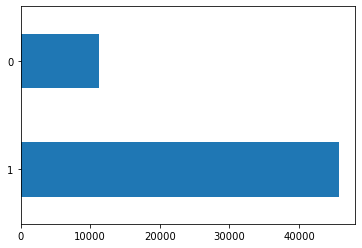

In [48]:
train_df.HUB_X3.value_counts().plot(kind = 'barh')
train_df.HUB_X3.value_counts()

0    29028
1    28106
Name: HUB_X4, dtype: int64

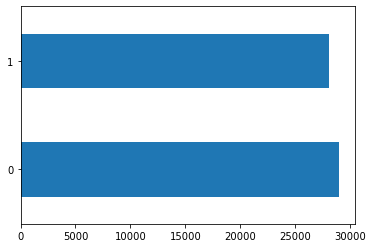

In [49]:
train_df.HUB_X4.value_counts().plot(kind = 'barh')
train_df.HUB_X4.value_counts()

### Bivariate Analysis

Next, bivariate analysis is conducted in order to see if there are any relationships between the dependent variable and any of the independent variables. Several scatterplots will be displayed to see if there any correlations between medical costs and the numerical dependent variables.

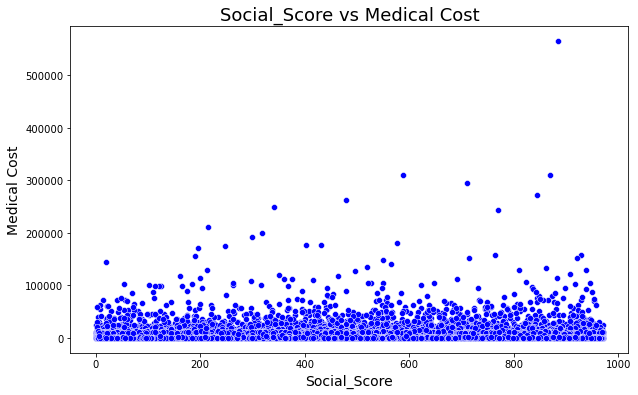

In [50]:
# Running a scatterplot comparing Social Score and Medical Cost
plt.figure(figsize = (10,6))
sns.scatterplot(x= 'Social_Score',y='Medical_Cost',color='b',data= train_df)
plt.title('Social_Score vs Medical Cost',size=18)
plt.xlabel('Social_Score',size=14)
plt.ylabel('Medical Cost',size=14)
plt.show()

Plotting the social score against the medical cost, there doesn't appear to be any sort of a linear relationship and there appears to be one outlier with a high medical cost against the social score

Let's see what happens when the outlier is removed:


In [51]:
train_df = train_df[(train_df['Medical_Cost'] < 500000)]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57133 entries, 1 to 57134
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Member_ID                  57133 non-null  object 
 1   Age                        57133 non-null  float64
 2   Gender                     57133 non-null  object 
 3   Zip_Code                   57133 non-null  int64  
 4   Locality                   57133 non-null  object 
 5   PC_Cluster                 57133 non-null  object 
 6   HUB_X1                     57133 non-null  int64  
 7   HUB_X2                     57133 non-null  int64  
 8   HUB_X3                     57133 non-null  int64  
 9   HUB_X4                     57133 non-null  int64  
 10  Web_Code                   57133 non-null  object 
 11  PCP_Status                 57133 non-null  object 
 12  Social_Score               57133 non-null  float64
 13  Face_Rec                   57133 non-null  int

Now, let's see run the plot again but without the outlier:

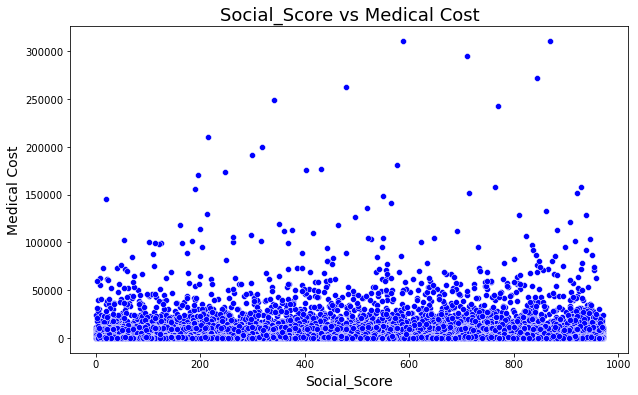

In [52]:
# Running a scatterplot comparing Social Score and Medical Cost without outlier
plt.figure(figsize = (10,6))
sns.scatterplot(x= 'Social_Score',y='Medical_Cost',color='b',data= train_df)
plt.title('Social_Score vs Medical Cost',size=18)
plt.xlabel('Social_Score',size=14)
plt.ylabel('Medical Cost',size=14)
plt.show()

While there doesn't seem to be a normal distribution, the spread of the values are more readable without the outlier

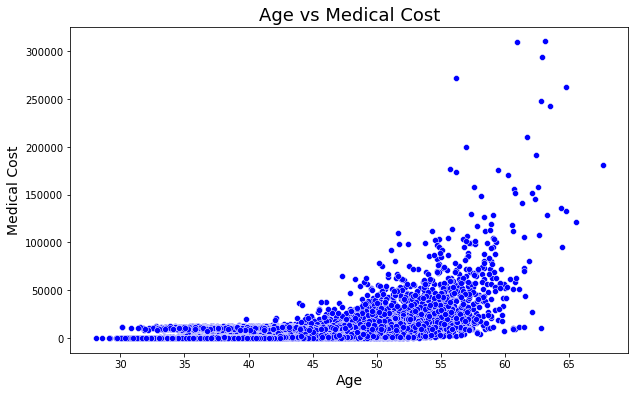

In [53]:
plt.figure(figsize = (10,6))
sns.scatterplot(x= 'Age',y='Medical_Cost',color='b',data= train_df)
plt.title('Age vs Medical Cost',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Medical Cost',size=14)
plt.show()

It seem that there is evidence of a positive correlation between age and medical cost. The correlation appears to start shifting upward at around 45 years of age. It seem that the older a patient is, the more likely they will incur high medical costs. There also seems to be a significant outlier of a 70+ year old person with over $500,000 in medical costs.

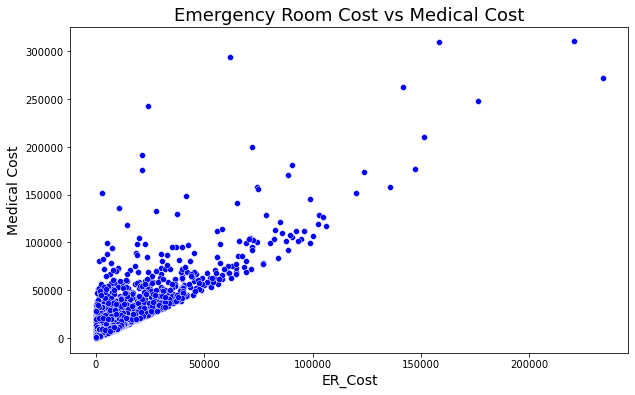

In [54]:
plt.figure(figsize = (10,6))
sns.scatterplot(x= 'ER_Cost',y='Medical_Cost',color='b',data= train_df)
plt.title('Emergency Room Cost vs Medical Cost',size=18)
plt.xlabel('ER_Cost',size=14)
plt.ylabel('Medical Cost',size=14)
plt.show()

Looking at the graph above, a positive correlation appears between emergency room cost and medical costs. As a person emergency room costs rises, the medical costs rise as well. The ER_Cost variable could play a significant factor in predicting medical costs for a patient.

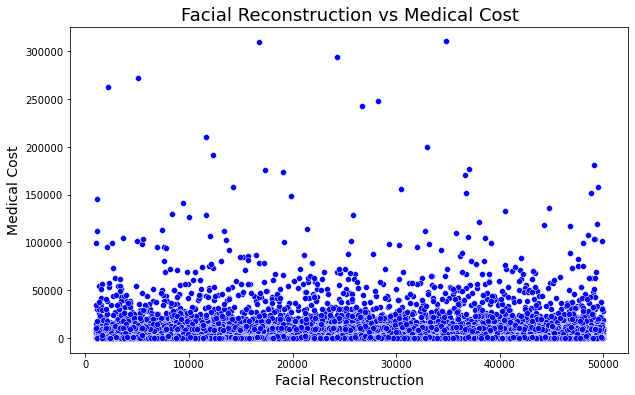

In [55]:
plt.figure(figsize = (10,6))
sns.scatterplot(x= 'Face_Rec',y='Medical_Cost',color='b',data= train_df)
plt.title('Facial Reconstruction vs Medical Cost',size=18)
plt.xlabel('Facial Reconstruction',size=14)
plt.ylabel('Medical Cost',size=14)
plt.show()

There doesn't seem to be a significant relationship betweeen facial reconstruction costs and medical costs. There does seem to be a significant outlier with medical costs over $500,000 at the very top of the graph.

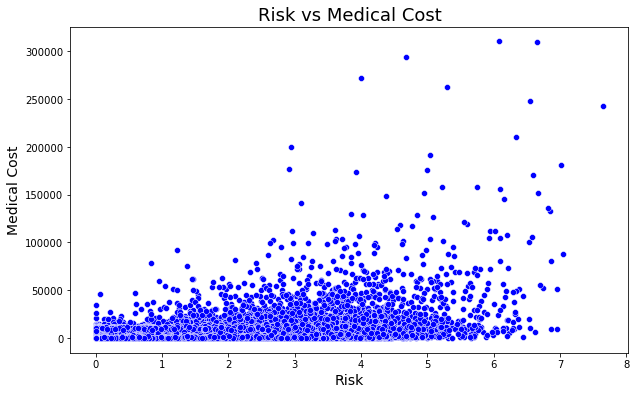

In [56]:
plt.figure(figsize = (10,6))
sns.scatterplot(x= 'Risk',y='Medical_Cost',color='b',data= train_df)
plt.title('Risk vs Medical Cost',size=18)
plt.xlabel('Risk',size=14)
plt.ylabel('Medical Cost',size=14)
plt.show()

Looking above, there appears to evidence of a positive relationship between risk and medical costs. 
It seems that the higher the risk of a patient, the more likely that patient will incur high medical costs. The Risk variable could play a significant factor in predicting medical costs.

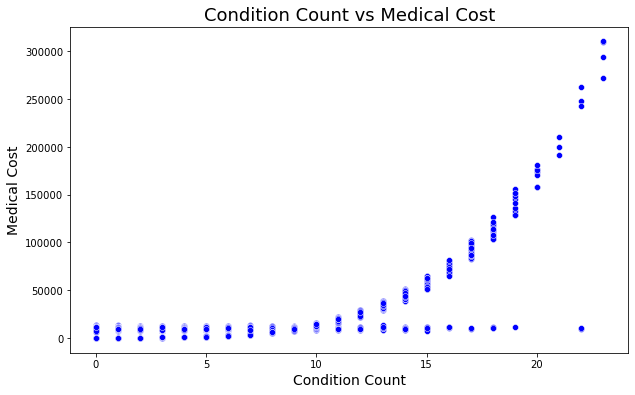

In [57]:
plt.figure(figsize = (10,6))
sns.scatterplot(x= 'Condition_Count',y='Medical_Cost',color='b',data= train_df)
plt.title('Condition Count vs Medical Cost',size=18)
plt.xlabel('Condition Count',size=14)
plt.ylabel('Medical Cost',size=14)
plt.show()

Based on the graph above, a positive correlation does seem to appear between the number of condition a patient has and the medical cost. The correlation shows that the more conditions a person is afflicted with, the higher the person's medical cost. One thing to note is, again, the outlier which peaks at around 26 conditions and over $500,000 in medical costs.

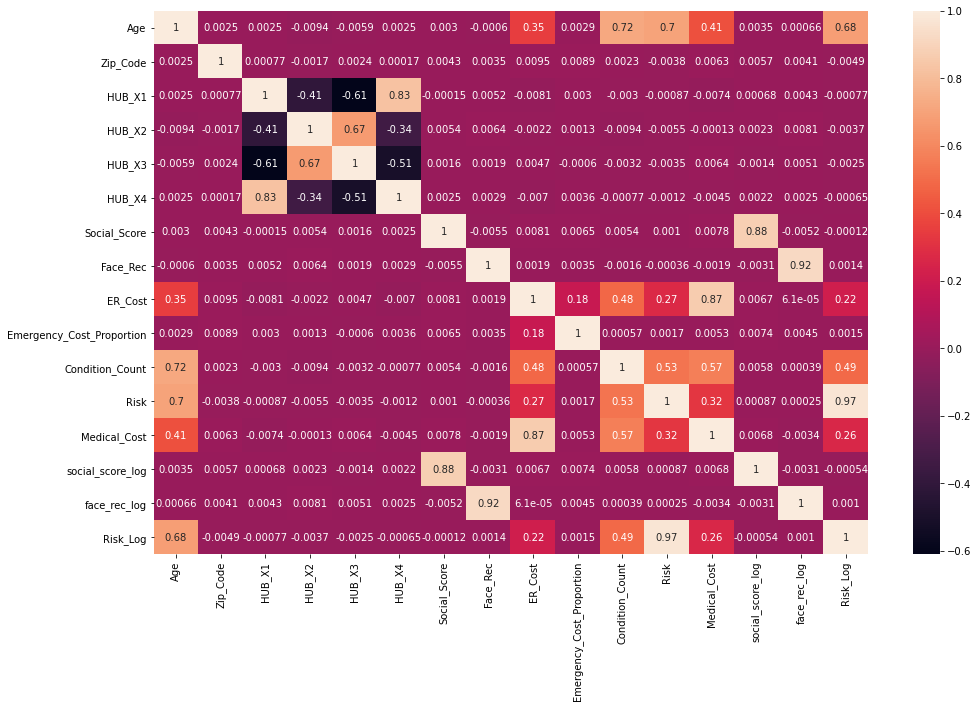

In [58]:
# Running a heatmap correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(train_df.corr(), annot = True);

The correlation heatmap matrix above also seem to reinfornce the findings within the EDA analysis. There appears to be positive correlations between Medical_Cost and the following:

ER_Cost: 0.82
Condition_Count: 0.53
Age: 0.39
Risk: 0.30

The four variables above appear to have a significant influence in predicting medical costs for a patient.

### Train Clicks

It would also be helpful to analyze the train clicks dataset as well

In [59]:
train_clicks_df.head(5)

,Member_ID,Landing,Visits
1,Q8330858,Homepage,452
2,F1978372,Homepage,2
3,E2172254,Homepage,49
4,N9540435,Homepage,1
5,H9542914,Homepage,234


Appeal_Claims           17241
Pay_Claims              17241
Check_Deductible        17241
Homepage                17241
Authorization_Status    17241
Name: Landing, dtype: int64

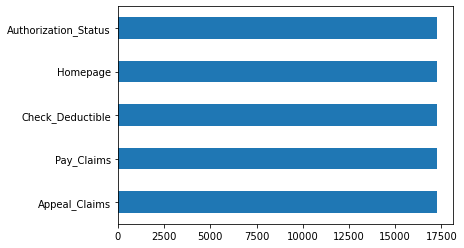

In [60]:
train_clicks_df.Landing.value_counts().plot(kind = 'barh')
train_clicks_df.Landing.value_counts()

Based on the above, there are 17,241 instances of landing pages for the check deductible page, homepage, pay claims, authorization status, and appeal claims page.

# 3. Data Cleaning/ Feature Engineering

Based on the datasets provided, a good amount of data cleaning will need to be done in order to get these datasets ready for machine learning. 

I've already removed the outlier with the over 500000 medical cost. There are a number of text columns within the dataset. Because machine learning models work off of numerical data, I will need to one hot encode the variables in order to feed the possible features into the machine learning models.

Next, because there are text columns within the train_df dataset, I will need to use one hot encoding within those text variables in order to process them for my the machine learning model. I will do this using the get_dummies function.



In [61]:
# Running the get dummies enconding on the categorical columns
train_df = pd.get_dummies(train_df, columns = ['Gender', 'Locality', 'PC_Cluster', 'PCP_Status'], drop_first=True)
train_df.head(5)

,Member_ID,Age,Zip_Code,HUB_X1,HUB_X2,HUB_X3,HUB_X4,Web_Code,Social_Score,Face_Rec,...,face_rec_log,Risk_Log,Gender_M,Gender_U,Locality_Rural,Locality_Suburb,PC_Cluster_Low Web Activity Identified,PC_Cluster_Moderate Web Activity Identified,PCP_Status_No PCP,PCP_Status_Value-Based PCP
1,R7047662,41.000099,33418,0,1,1,0,N41,158.8,2588,...,7.859027,0.622407,1,0,1,0,0,1,0,1
2,H2687125,45.882875,32026,0,1,1,0,U41,878.6,15138,...,9.625029,1.000911,1,0,1,0,0,1,0,1
3,A9673604,45.546725,33598,0,1,1,0,W67,921.8,9786,...,9.188810,0.820375,1,0,1,0,0,1,0,1
4,L7196058,46.049514,32569,0,1,1,0,J20,781.9,25203,...,10.134758,0.914605,0,0,1,0,0,1,0,1
5,O0202680,40.002749,33032,0,1,1,0,J13,770.9,1555,...,7.349874,0.904288,0,0,1,0,0,1,0,1


In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57133 entries, 1 to 57134
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Member_ID                                    57133 non-null  object 
 1   Age                                          57133 non-null  float64
 2   Zip_Code                                     57133 non-null  int64  
 3   HUB_X1                                       57133 non-null  int64  
 4   HUB_X2                                       57133 non-null  int64  
 5   HUB_X3                                       57133 non-null  int64  
 6   HUB_X4                                       57133 non-null  int64  
 7   Web_Code                                     57133 non-null  object 
 8   Social_Score                                 57133 non-null  float64
 9   Face_Rec                                     57133 non-null  int64  
 10

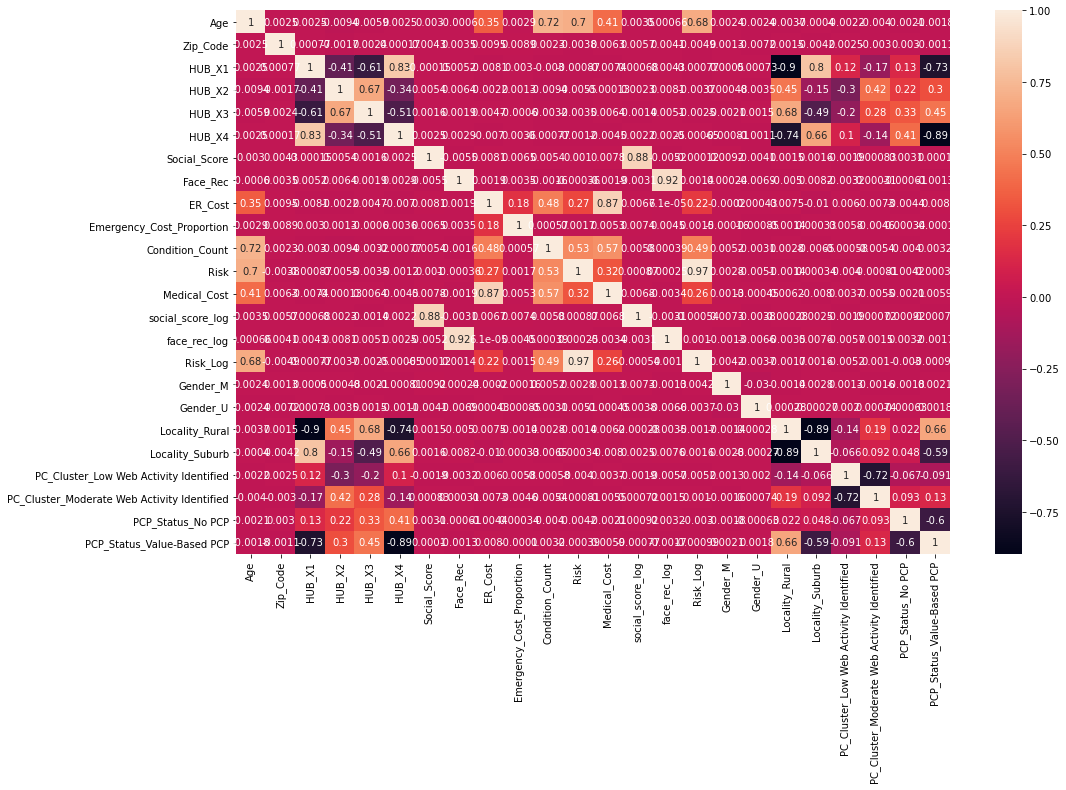

In [63]:
plt.figure(figsize=(16,10))
sns.heatmap(train_df.corr(), annot = True);

There are now 23 attributes within the dataset given the one hot encoding of the categorical variables. This one hot encoding creates new features that could possibly be used for the model build.

If I left join the train clicks dataset as is with the train_df dataframe, I will get duplicate rows being that there are multiple member id's within the train_clicks dataset. Therefore, I wll need to reshape and pivot the dataset using the Landing values as columns and filling the values in with the number of visits.

In [64]:
# Pivoting the data
train_clicks_df = train_clicks_df.pivot(index='Member_ID', columns='Landing', values='Visits')
train_clicks_df.head(5)

Landing,Appeal_Claims,Authorization_Status,Check_Deductible,Homepage,Pay_Claims
Member_ID,,,,,
A0026034,0,0,0,1,0
A0046273,0,0,0,378,0
A0074339,0,0,0,2,0
A0075503,1,0,2,2,1
A0103026,0,0,1,1,0


Now, I will join the train_df dataset with the train_clicks_df dataset in order to combine these into one dataset and include additional columns to possibly use for the machine learning build. 

In [65]:
# Left joining the data on member id with the pivoted data
combined_train_df = pd.merge(train_df, train_clicks_df, on= 'Member_ID',how='left')
combined_train_df

,Member_ID,Age,Zip_Code,HUB_X1,HUB_X2,HUB_X3,HUB_X4,Web_Code,Social_Score,Face_Rec,...,Locality_Suburb,PC_Cluster_Low Web Activity Identified,PC_Cluster_Moderate Web Activity Identified,PCP_Status_No PCP,PCP_Status_Value-Based PCP,Appeal_Claims,Authorization_Status,Check_Deductible,Homepage,Pay_Claims
0,R7047662,41.000099,33418,0,1,1,0,N41,158.8,2588,...,0,0,1,0,1,NaN,NaN,NaN,NaN,NaN
1,H2687125,45.882875,32026,0,1,1,0,U41,878.6,15138,...,0,0,1,0,1,NaN,NaN,NaN,NaN,NaN
2,A9673604,45.546725,33598,0,1,1,0,W67,921.8,9786,...,0,0,1,0,1,NaN,NaN,NaN,NaN,NaN
3,L7196058,46.049514,32569,0,1,1,0,J20,781.9,25203,...,0,0,1,0,1,NaN,NaN,NaN,NaN,NaN
4,O0202680,40.002749,33032,0,1,1,0,J13,770.9,1555,...,0,0,1,0,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57128,R9399695,45.760370,33524,0,1,1,0,V26,156.8,27453,...,0,0,1,0,1,311.0,0.0,144.0,415.0,216.0
57129,D9151442,44.058900,32163,1,1,0,1,I32,918.3,21202,...,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN
57130,Z2405312,43.403600,33991,1,1,0,1,K21,208.6,38789,...,1,0,1,0,0,0.0,0.0,0.0,2.0,0.0
57131,V0359605,40.568600,32118,0,1,1,0,W68,299.2,8758,...,0,0,1,0,1,NaN,NaN,NaN,NaN,NaN


As shown above, the datasets have now been combined into one. But as also shown, there appear to be some null values appearing for the new columns. Let's take a closer look:



In [66]:
combined_train_df.isnull().sum()

Member_ID                                          0
Age                                                0
Zip_Code                                           0
HUB_X1                                             0
HUB_X2                                             0
HUB_X3                                             0
HUB_X4                                             0
Web_Code                                           0
Social_Score                                       0
Face_Rec                                           0
ER_Cost                                            0
Emergency_Cost_Proportion                          0
Condition_Count                                    0
Risk                                               0
Medical_Cost                                       0
social_score_log                                   0
face_rec_log                                       0
Risk_Log                                           0
Gender_M                                      

Indeed, there are about 39,893 columns for the converted landing pages from the train_clicks_df. This is most likely because there are some patients who we have no record as to whether they visited a web page or not. Because I do want to drop any rows with NA amd because there are are already values of 0 within the dataset, I will impute the NA values by using the mean for each individual column as shown below:

In [67]:
# making new variables with the average mean of eachc respective column
claims_mean =  combined_train_df['Appeal_Claims'].mean()
status_mean =  combined_train_df['Authorization_Status'].mean()
deductible_mean =  combined_train_df['Check_Deductible'].mean()
homepage_mean =  combined_train_df['Homepage'].mean()
pay_mean =  combined_train_df['Pay_Claims'].mean()

In [68]:
# filling the Na values with the average mean per column
combined_train_df['Appeal_Claims'] = combined_train_df['Appeal_Claims'].fillna(claims_mean)
combined_train_df['Authorization_Status'] = combined_train_df['Authorization_Status'].fillna(status_mean)
combined_train_df['Check_Deductible'] = combined_train_df['Check_Deductible'].fillna(deductible_mean)
combined_train_df['Homepage'] = combined_train_df['Homepage'].fillna(homepage_mean)
combined_train_df['Pay_Claims'] = combined_train_df['Pay_Claims'].fillna(pay_mean)

In [69]:
combined_train_df.head(5)

,Member_ID,Age,Zip_Code,HUB_X1,HUB_X2,HUB_X3,HUB_X4,Web_Code,Social_Score,Face_Rec,...,Locality_Suburb,PC_Cluster_Low Web Activity Identified,PC_Cluster_Moderate Web Activity Identified,PCP_Status_No PCP,PCP_Status_Value-Based PCP,Appeal_Claims,Authorization_Status,Check_Deductible,Homepage,Pay_Claims
0,R7047662,41.000099,33418,0,1,1,0,N41,158.8,2588,...,0,0,1,0,1,16.636021,3.619954,45.296752,108.331265,23.834397
1,H2687125,45.882875,32026,0,1,1,0,U41,878.6,15138,...,0,0,1,0,1,16.636021,3.619954,45.296752,108.331265,23.834397
2,A9673604,45.546725,33598,0,1,1,0,W67,921.8,9786,...,0,0,1,0,1,16.636021,3.619954,45.296752,108.331265,23.834397
3,L7196058,46.049514,32569,0,1,1,0,J20,781.9,25203,...,0,0,1,0,1,16.636021,3.619954,45.296752,108.331265,23.834397
4,O0202680,40.002749,33032,0,1,1,0,J13,770.9,1555,...,0,0,1,0,1,16.636021,3.619954,45.296752,108.331265,23.834397


In [70]:
combined_train_df.isnull().sum()

Member_ID                                      0
Age                                            0
Zip_Code                                       0
HUB_X1                                         0
HUB_X2                                         0
HUB_X3                                         0
HUB_X4                                         0
Web_Code                                       0
Social_Score                                   0
Face_Rec                                       0
ER_Cost                                        0
Emergency_Cost_Proportion                      0
Condition_Count                                0
Risk                                           0
Medical_Cost                                   0
social_score_log                               0
face_rec_log                                   0
Risk_Log                                       0
Gender_M                                       0
Gender_U                                       0
Locality_Rural      

As shown above, it appears that there are no more null values within the new dataset

<AxesSubplot:>

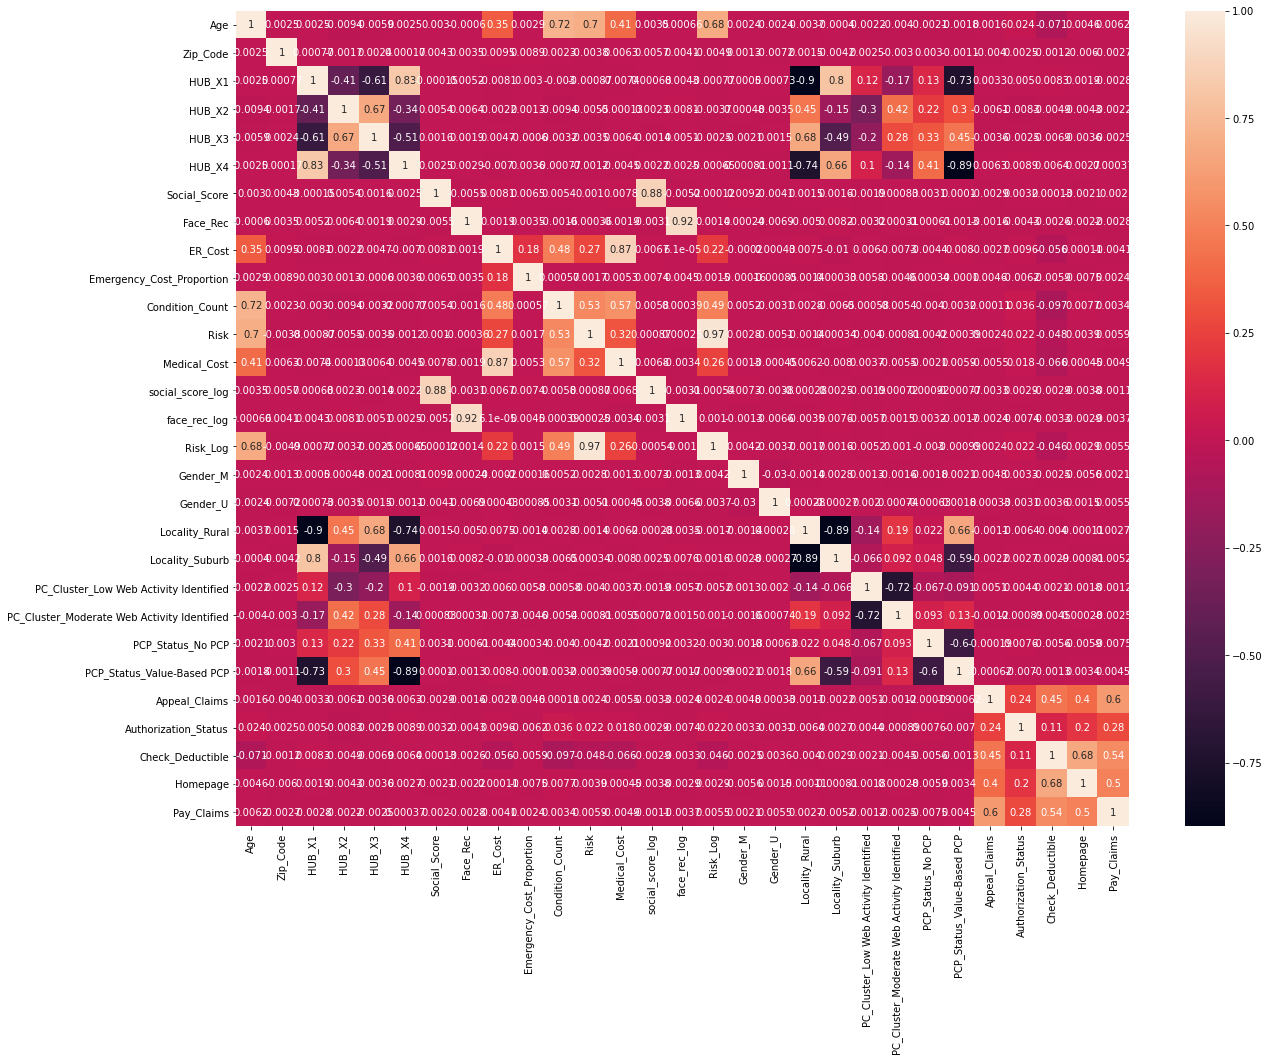

In [71]:
# Running the correlation heatmap matrix again with all variables
plt.figure(figsize=(20,15))
pd.set_option('display.max_columns', None)
sns.heatmap(combined_train_df.corr(), annot = True)

Based on the above correlation matrix, it seems that all the variables are now numerical. But the only variables that seem to be important are still age, er_cost, condition_count, and risk. While risk_log may have a positive correlation with medical_cost, because the risk variable has a higher coefficient and introducting risk_log with risk would bring in colinearity, I will instead use only risk. 

Based on the rest of the correlation matrix and the preciding EDA, I don't believe any of the other columns play a significant factor in predicting model costs. Moreoevr, I will be pulling from the train_df dataset without the joined train_clicks dataset. The reason I am making this decision is because the Visits and Web Pages had no correlation with medical costs. Thus, there is no reason to pull from the combined dataframe nor is it necessary to perform the same operations within the unseen test dataset later on. I don't believe it's neccessary as I've proven that based on my previous analysis.

For instance, zip code and member id shouldn't be in the model as they only identify the patient and where the patient lives. But they do not play a factor in determining medical costs for entirely new patients.

# 4. Model Preparation

In terms of preparing the model, I will need to isolate the independent variables which will be Age, ER_Cost, Condition_Count and Risk and isolate Medical_Cost as my dependent variable as shown below:

In [72]:
x_train = train_df[['Condition_Count', 'Age', 'ER_Cost', 'Risk']]
x_train.shape

(57133, 4)

In [73]:
y_train = train_df['Medical_Cost']
y_train.shape

(57133,)

Before I proceed, it would be helpful to check for any type of multicolinearity among the variables I have selected. Below is a function that will check for multicolinearity:

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [75]:
calc_vif(x_train)

,variables,VIF
0,Condition_Count,2.839398
1,Age,2.566733
2,ER_Cost,1.425809
3,Risk,3.026847


If the VIF score was higher than 5 or 10, I'd have to remove one of the variables. Because all of the variables VIF scores are below 5, I can safely say that there is no multicolinearity within the dependent variables which will be used for the model run.

Then, I will be splitting the dataset into train and test datasets respectively. An 80/20 split will be used for the models run:

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, random_state=1, train_size=0.8)

In [77]:
X_train.shape

(45706, 4)

In [78]:
X_test.shape

(11427, 4)

In [79]:
y_train.shape

(45706,)

In [80]:
y_test.shape

(11427,)

As shown by the shapes above, the data has been split. Because the independent variables are of a different scale, I will need to standardize the independent variables with Standard Scaler in for each x variable to have the same level of scale. 

In [81]:
scaler = StandardScaler()

I apply fit_transform on the X_train dataset:

In [82]:
X_train = scaler.fit_transform(X_train)
print(X_train)

[[-0.79398712 -0.78188352 -0.27640526 -1.0198153 ]
 [ 1.13253915  1.35660873 -0.27176702  0.41943593]
 [ 0.16927601  0.30334979  0.16583195  0.0636286 ]
 ...
 [ 0.81145144  0.91229524 -0.12220983 -0.92590017]
 [-0.79398712 -0.81038783 -0.28670065 -1.0198153 ]
 [ 0.16927601 -0.36439467  1.52590097 -1.0198153 ]]


I apply .transform on the X_test dataset. The reason why I do this is to prevent any posssibility of data leakage throughout my test.

In [83]:
X_test = scaler.transform(X_test)
print(X_test)

[[ 0.81145144  0.53768763  0.57215301  0.5915526 ]
 [-0.79398712  0.83887193 -0.29286621  0.29528619]
 [ 1.45362686  0.81673891 -0.26573272 -0.3444223 ]
 ...
 [ 1.13253915  0.46283755  0.04471471 -0.0473715 ]
 [ 1.45362686 -0.7396641   0.3451418  -0.37233775]
 [-0.79398712 -0.16991959  0.51358325 -0.33991051]]


# 5. Model Runs

Because the ask is to predict medical costs which is numeric, regression models will be used for this problem. Random forest, support vector machine, and xgboost regression models will be ran to determine which is the best model. The reason I am picking these models is because these are non parametric models that don't have strong assumptions on the normality of the data.

For context, age is the only variable that follows a normal distribution. The rest of the independent variables do not and it's a clear assumption that needs to be followed for linear regression.

### Random Forest Regression

In [84]:
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [85]:
y_pred = rf.predict(X_test)

In [86]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 445.1978362561976
Mean Squared Error: 2892924.2513928814
Root Mean Squared Error: 1700.859856482268


Based on the above metrics, it seem the RMSE is about 1700 while the mean absolute error is 445 and the mean squared error is abou 2,892,924. I want to focus on the RMSE as this is scaled in the same measure of units as the target variable which is in dollars. This is basically saving that my model will generally be off by about $1,700.

While that may seem extremly high by modeling purposes, the only reason it is high is because the dependent varible is not scaled to the same measurement as the indepdendent variables which are scaled. I'll demonstrate by using a log of the dependent variable and using that as the target:

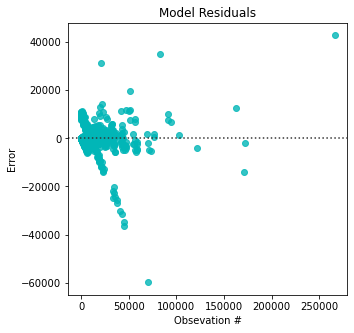

In [87]:
# Plotting the residual plot for Random Forest
fig, ax = plt.subplots(figsize =(5,5))
sns.residplot(x=y_pred,y=y_test-y_pred, color='#01B6B7')
plt.title('Model Residuals')
plt.xlabel('Obsevation #')
plt.ylabel('Error');

Looking at the residual plot above, there does seem to be a couple of outliers. However, it seems that somee of the values are spread around 0 which is good in this case.

### Random Forest (With Log Variable)

In [88]:
train_df['Medical_Cost_Log'] = np.log1p(train_df['Medical_Cost'])
print(train_df['Medical_Cost_Log'])

1        4.950939
2        7.659651
3        6.370870
4        9.295603
5        9.203781
           ...   
57130    7.062611
57131    7.473234
57132    7.223639
57133    0.000000
57134    6.368256
Name: Medical_Cost_Log, Length: 57133, dtype: float64


The log has been taken and is now scaled. Now I will use this as the dependent variable for demonstration purposes:

In [89]:
y_train_log = train_df['Medical_Cost_Log']
y_train_log.shape

(57133,)

The same train test split will be needed again:

In [90]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(x_train, y_train_log, random_state=1, train_size=0.8)

The same scaling transformations will need to be applied again on X_train and X_test

In [91]:
X_train_log = scaler.fit_transform(X_train_log)
print(X_train_log)

[[-0.79398712 -0.78188352 -0.27640526 -1.0198153 ]
 [ 1.13253915  1.35660873 -0.27176702  0.41943593]
 [ 0.16927601  0.30334979  0.16583195  0.0636286 ]
 ...
 [ 0.81145144  0.91229524 -0.12220983 -0.92590017]
 [-0.79398712 -0.81038783 -0.28670065 -1.0198153 ]
 [ 0.16927601 -0.36439467  1.52590097 -1.0198153 ]]


In [92]:
X_test_log = scaler.transform(X_test_log)
print(X_test_log)

[[ 0.81145144  0.53768763  0.57215301  0.5915526 ]
 [-0.79398712  0.83887193 -0.29286621  0.29528619]
 [ 1.45362686  0.81673891 -0.26573272 -0.3444223 ]
 ...
 [ 1.13253915  0.46283755  0.04471471 -0.0473715 ]
 [ 1.45362686 -0.7396641   0.3451418  -0.37233775]
 [-0.79398712 -0.16991959  0.51358325 -0.33991051]]


In [93]:
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(X_train_log, y_train_log);
y_pred = rf.predict(X_test_log)

In [94]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_log, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_log, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_log, y_pred)))

Mean Absolute Error: 0.25828265533514705
Mean Squared Error: 0.3049425923786466
Root Mean Squared Error: 0.5522160739951768


As shown above, the RMSE is now at 0.55, the MAE is at 0.25, and the MSE is at 0.30. From a modeling perspective, these are much better metrics becaues they fall within the range of 1 and 0 but the log variable cannot be used for interpretable predictions. Therefore, I will be sticking to the original Medical Cost variable to keep those predictions.

In [95]:
print(r2_score(y_test_log, y_pred))

0.9629356679442552


In [96]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(20))

             Actual  Predicted
6975   10662.828813   9.230382
517       33.644424   3.674852
53726   4576.481000   8.236160
601       37.438687   3.682726
32881    902.025400   6.958651
39444    210.298700   4.659629
56752      0.000000   0.000000
31927   8411.360000   9.164562
8491     434.776232   5.950070
38040    248.118400   5.594718
8607     168.494289   4.653205
46747     37.481770   4.516240
56507    500.642200   6.394300
44460  11237.070000   9.327376
4529     335.875421   6.000826
12830      0.000000   0.000000
33829    235.564600   5.333007
47918   1246.180000   7.362418
12628    306.379620   5.926643
44516    143.735100   5.533784


You will notice from above that the my actual predictions don't seem to stray too far off from the predicted predictions as shown above.

In [97]:
print(r2_score(y_test, y_pred))

-0.14575230773623815


The R2 seems to perform worse on the test set. It's possible that the model is being overfit somehow. 

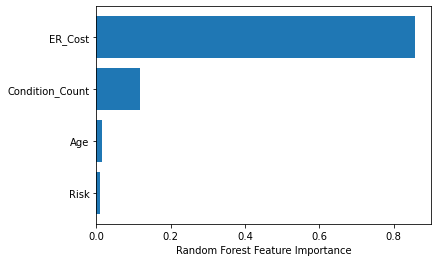

In [98]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

Based on the feature importance plot above, it can be shown that the number of conditions as well as the emergency room cost play a significant part in determining the medical costs for a patient. while Age and Risk did have somewhat of a positive correlation on the Medical_Cost variable, they don't seem to play as much importance as the number of conditions and the emergency room cost.

However, ER_Cost seems to explain the dataset almost too well. Let's explore some of the other datasets to see their metrics before removing any variables though.

### SVM

Next, a support vector machine will be run on the dataset to see how the dataset compares with the other models. I'll be using the Medical Cost variable without the log transformation going forward:

In [99]:
regressor=SVR(kernel='rbf') 
regressor.fit(X_train, y_train)

SVR()

The predictions are run on the test set as shown below:

In [100]:
y_pred = regressor.predict(X_test)

In [101]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1943.7658489250828
Mean Squared Error: 48840072.84994183
Root Mean Squared Error: 6988.567295944272


Based on the metrics above, it does not appear that SVM is a very good model compared to the others. The RMSE is extremely high compared to the other models with 6,988, the MAE at 1,943, and the MSE at an extremly high value. What this is basically saying is that my model will generally be off by abouut $6,988 dollars. 

In [102]:
print(r2_score(y_test, y_pred))

0.06165522764695286


The R2 for the SVM model is particularly bad. It's extremly bad actually. I don't intend to go forward using the SVM as my model.

In [103]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(20))

             Actual    Predicted
6975   10662.828813  2544.515930
517       33.644424   158.081011
53726   4576.481000  2522.897800
601       37.438687   146.045693
32881    902.025400  1108.656400
39444    210.298700    91.689095
56752      0.000000   324.515400
31927   8411.360000   814.535550
8491     434.776232   282.100265
38040    248.118400   170.350071
8607     168.494289    64.217134
46747     37.481770    20.528606
56507    500.642200   596.767596
44460  11237.070000  2572.191019
4529     335.875421   364.863187
12830      0.000000    44.436401
33829    235.564600    46.640535
47918   1246.180000  1280.557900
12628    306.379620   405.695509
44516    143.735100   301.679351


As shown above, the predictions are much worse than what the random forest actually predicted. Therefore, I would not pick support vector machines as the best model to use.

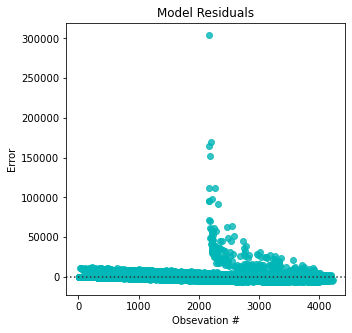

In [104]:
# Plotting the residual plot for SVM
fig, ax = plt.subplots(figsize =(5,5))
sns.residplot(x=y_pred,y=y_test-y_pred, color='#01B6B7')
plt.title('Model Residuals')
plt.xlabel('Obsevation #')
plt.ylabel('Error');

Based on the residual plot above, it seems that a lot of the values are not spread very evenly around 0. This reinforces the fact that SVM would not be a very good model.

### XG Boost

Finally, an XGboost regression model is run on the dataset to see how it compares to the other models.

In [105]:
xgb_r = XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 12, seed = 123)

In [106]:
# Fitting the model
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=12, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [107]:
# Predict the model
y_pred = xgb_r.predict(X_test)

In [108]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 467.1479346427703
Mean Squared Error: 2730110.898507587
Root Mean Squared Error: 1652.3047232600852


Based on the RMSE, the model is basically saying that my prediction's will be off by about $1,652 with an MAE of 467 and an MSE of 2,730,110. This is the actually the best peforming model so far and in the context of medical costs, I don't believe this is too bad compared to the others.

In [109]:
print(r2_score(y_test, y_pred))

0.9475474719820831


The fit of the model seems to be slightly high with 0.94. It's possible that there is some overfitting happening within the model.

In [110]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(20))

             Actual     Predicted
6975   10662.828813   9867.750000
517       33.644424     64.566452
53726   4576.481000   4111.395020
601       37.438687     64.566452
32881    902.025400   1073.167358
39444    210.298700    125.284096
56752      0.000000     64.566452
31927   8411.360000   9761.787109
8491     434.776232    350.831299
38040    248.118400    258.399048
8607     168.494289    125.284096
46747     37.481770     91.516716
56507    500.642200    424.356415
44460  11237.070000  10856.277344
4529     335.875421    289.603088
12830      0.000000     64.566452
33829    235.564600    341.312622
47918   1246.180000   2739.159668
12628    306.379620    677.835327
44516    143.735100    341.312622


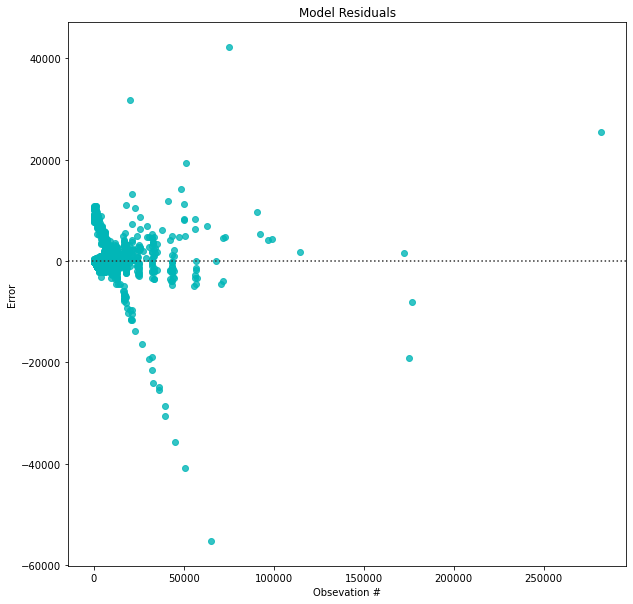

In [111]:
# Plotting the residual plot for XG Boost
fig, ax = plt.subplots(figsize =(10,10))
sns.residplot(x=y_pred,y=y_test-y_pred, color='#01B6B7')
plt.title('Model Residuals')
plt.xlabel('Obsevation #')
plt.ylabel('Error');

Looking above at the resisual plot, the predictions are actually not that far off from the actual values. This might be due in part due to the overfitting. In the grand context though, this does apppear to be the best model out of the non-parametric models I've ran so far.

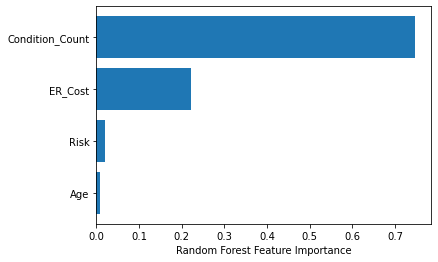

In [112]:
sorted_idx = xgb_r.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], xgb_r.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

Very similar to the random forest feature importance plot, it seems that number of conditions and the emergency room cost played the biggest factors in determining medical costs. Age and risk don't seem to play as much of a factor although risk tends to outperform age when it comes to XG boost.

Out of all the models ran, it appears that XG boost is the best model that can accurately predict medical costs.

## 6. Hyperparameter Tuning



With picking Xg boost as the best model, I will now run some hyperparameter tuning to see what values would best be able to improve the model. Below, a function is created where I'm checking to see 

In [113]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [5, 10, 15],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,  # 5 fold cross validation to determie 
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [114]:
#Run only in the first run of the kernel.
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.7min finished


{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 15,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [115]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.1,
        max_depth = 7,
        min_child_weight = 1,
        n_estimators = 15,
        subsample = 0.7)



In [116]:
# Fitting the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=15, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
# Predict the model
y_pred = xgb_model.predict(X_test)

In [118]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1481.1839189068194
Mean Squared Error: 12191264.948678372
Root Mean Squared Error: 3491.599196454022


Based on the above, it doesn't appear that the hyperparameter tuning did much in terms of improving the model. In fact, it actually looks like it did quite worse with a lower RMSE than the original model I had run. Therefore, I believe I will be sticking with the original model.

# 7. Testing on New Data

It's time to test the xgboost model on new data! First, the test data is brought in:

In [119]:
test_df = pd.read_csv('test_better_health.csv', index_col = 0)
test_df.head(5)

,Member_ID,Age,Gender,Zip_Code,Locality,PC_Cluster,HUB_X1,HUB_X2,HUB_X3,HUB_X4,Web_Code,PCP_Status,Social_Score,Face_Rec,ER_Cost,Emergency_Cost_Proportion,Condition_Count,Risk
1,G6163311,36.775571,F,33434,Rural,Moderate Web Activity Identified,0,1,1,0,G25,Value-Based PCP,874.0,33809,13.53,0.06,0,0.000000
2,J8888895,36.512731,M,34141,Country,Computer Super User,1,0,0,1,B37,Assigned PCP,709.9,8400,0.00,0.07,0,0.194113
3,A9604597,42.508792,M,33574,Suburb,Moderate Web Activity Identified,1,1,0,1,J14,Assigned PCP,740.0,12722,9287.69,0.92,0,2.515455
4,J3061352,46.068409,F,32667,Rural,Moderate Web Activity Identified,0,1,1,0,A80,No PCP,950.9,45463,1399.62,0.87,5,3.020462
5,D0807949,47.553930,M,34778,Suburb,Moderate Web Activity Identified,1,1,0,1,M80,Assigned PCP,32.8,22518,259.96,0.53,3,1.934442


Next, I'll be making a new dataframe with the dependent variables I used during my train/test phase along with the Member_ID as I'll need that in order to join it back to the test_clicks dataset:

In [120]:
new_test_df = test_df[['Age', 'Risk', 'ER_Cost', 'Condition_Count']]
new_test_df.head(5)

,Age,Risk,ER_Cost,Condition_Count
1,36.775571,0.000000,13.53,0
2,36.512731,0.194113,0.00,0
3,42.508792,2.515455,9287.69,0
4,46.068409,3.020462,1399.62,5
5,47.553930,1.934442,259.96,3


In [121]:
new_test_df = scaler.fit_transform(new_test_df)
print(new_test_df)

[[-1.3225208  -1.01386215 -0.30754026 -0.79470338]
 [-1.38356058 -0.84628524 -0.31054001 -0.79470338]
 [ 0.00891686  1.15772509  1.74864594 -0.79470338]
 ...
 [-0.15043148 -1.01386215 -0.30823643 -0.79470338]
 [-0.84757513 -0.28167193 -0.31054001 -0.79470338]
 [ 0.09777585  0.60373815 -0.30619447 -0.14868185]]


In [122]:
pred = xgb_r.predict(new_test_df)

In [123]:
final_pred = pd.DataFrame()
final_pred['Member_ID'] = test_df['Member_ID']
final_pred['Prediction'] = pred

In [124]:
final_pred.head(5)

,Member_ID,Prediction
1,G6163311,64.566452
2,J8888895,64.566452
3,A9604597,10433.567383
4,J3061352,2070.471680
5,D0807949,2848.782471


In [125]:
final_pred.to_csv('final_predictions.csv', index=False)